In [1]:
from astropy.io import fits 
import numpy as np
import pandas as pd 
fits_file = fits.open('atlas-cdfs.fits')
print(fits_file)


In [2]:
header = fits_file[0].header 
print(header)

SIMPLE  =                    T  /                                               BITPIX  =                  -32  /                                               NAXIS   =                    4  /                                               NAXIS1  =                 3937  /                                               NAXIS2  =                 3057  /                                               NAXIS3  =                    1  /                                               NAXIS4  =                    1  /                                               EXTEND  =                    T  /                                               BSCALE  =    1.00000000000E+00  /                                               BZERO   =    0.00000000000E+00  /                                               BLANK   =                   -1  /                                               TELESCOP= 'ATCA    '  /                                                         CDELT1  =   -5.55555561268E-04  /       

In [3]:
image_data = fits_file[0].data
image_data = np.squeeze(image_data)
print(image_data)

image_data_df = pd.DataFrame(image_data)

[[ 2.34652834e-04  2.11749633e-04  1.24841376e-04 ...  5.40479186e-06
   6.27414047e-05  9.75416770e-05]
 [ 2.04005861e-04  1.70479063e-04  1.05049963e-04 ... -4.49310210e-05
  -1.75191781e-05 -1.06705002e-05]
 [ 1.41528362e-04  1.21329685e-04  1.05800616e-04 ... -2.85961960e-05
  -4.57380993e-05 -9.22132676e-05]
 ...
 [ 1.29584296e-04  1.35449445e-04  1.36358212e-04 ...  1.49436877e-04
  -5.12361112e-06 -1.13735434e-04]
 [ 7.85661614e-05  8.41733126e-05  1.08934510e-04 ...  1.64443423e-04
   7.09561618e-06 -1.41892247e-04]
 [ 4.46250524e-05  1.06628695e-05  3.29625291e-05 ...  1.63538920e-04
   3.97955919e-05 -1.11345144e-04]]


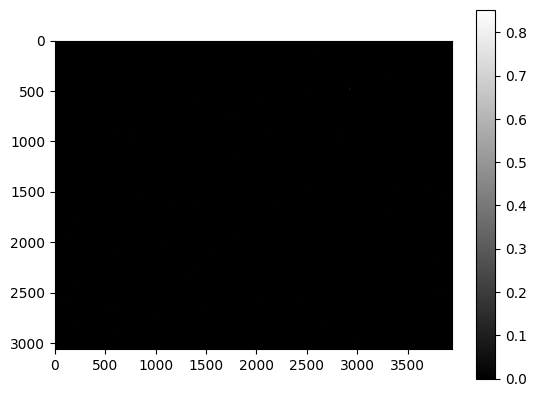

In [4]:
import matplotlib.pyplot as plt 
plt.figure()
plt.imshow(image_data, cmap='gray' )
plt.colorbar()
plt.show()


In [5]:
#Preprocessing data 

# flattened_data = image_data.flatten()
# normalised_data = flattened_data / np.max(flattened_data)
# print(normalised_data)

print(image_data_df)
image_data_df.to_csv("Atlas_data.xlsx", index=False)

          0         1         2         3         4         5         6      
0     0.000235  0.000212  0.000125 -0.000064 -0.000229 -0.000110  0.000161  \
1     0.000204  0.000170  0.000105 -0.000052 -0.000218 -0.000133  0.000139   
2     0.000142  0.000121  0.000106 -0.000007 -0.000186 -0.000159  0.000098   
3     0.000049  0.000071  0.000133  0.000073 -0.000125 -0.000175  0.000042   
4    -0.000061  0.000023  0.000175  0.000171 -0.000045 -0.000175 -0.000016   
...        ...       ...       ...       ...       ...       ...       ...   
3052  0.000200  0.000110  0.000029  0.000048  0.000015 -0.000098 -0.000125   
3053  0.000175  0.000144  0.000105  0.000116  0.000042 -0.000097 -0.000118   
3054  0.000130  0.000135  0.000136  0.000154  0.000062 -0.000086 -0.000100   
3055  0.000079  0.000084  0.000109  0.000148  0.000073 -0.000055 -0.000058   
3056  0.000045  0.000011  0.000033  0.000099  0.000072 -0.000005  0.000010   

          7         8         9     ...      3927      3928    


********KNN MODELING*******

In [6]:
from sklearn.preprocessing import StandardScaler

x = image_data_df.values
y = np.where(x.mean(axis = 1)> 0,1,0)

scaler = StandardScaler()
X_normalized = scaler.fit_transform(x)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)



KNeighborsClassifier()

In [8]:
from sklearn.metrics import accuracy_score, classification_report

# Predict test labels
y_pred = knn.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 90.85%
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       143
           1       0.94      0.94      0.94       469

    accuracy                           0.91       612
   macro avg       0.87      0.87      0.87       612
weighted avg       0.91      0.91      0.91       612



In [9]:
import pandas as pd

# Combine test data with predictions
test_results = pd.DataFrame({
    'Region Index': range(len(y_test)),
    'Actual': y_test,
    'Predicted': y_pred
})
print(test_results)


     Region Index  Actual  Predicted
0               0       1          1
1               1       1          1
2               2       0          0
3               3       1          0
4               4       1          1
..            ...     ...        ...
607           607       0          1
608           608       0          0
609           609       1          0
610           610       1          0
611           611       1          1

[612 rows x 3 columns]
